In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import astropy.units as u

import orbit_generator

In [2]:
R_EARTH = 6371.0  # km

def plot_2d_orbits(dfs, title):
    fig, ax = plt.subplots(figsize=(8, 8))
    for df in dfs:
        ax.plot(df['x_eci_km'], df['y_eci_km'], label=df['orbit_id'].iloc[0])
    earth = plt.Circle((0, 0), R_EARTH, color='blue', fill=True, alpha=0.5)
    ax.add_artist(earth)
    ax.set_aspect('equal')
    ax.set_xlim(-50000, 50000)
    ax.set_ylim(-50000, 50000)
    ax.set_xlabel('X ECI (km)')
    ax.set_ylabel('Y ECI (km)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)
    plt.show()

def plot_3d_orbits(dfs, title):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for df in dfs:
        ax.plot(df['x_eci_km'], df['y_eci_km'], df['z_eci_km'], label=df['orbit_id'].iloc[0])
    u_sph, v_sph = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x_sph = R_EARTH * np.cos(u_sph) * np.sin(v_sph)
    y_sph = R_EARTH * np.sin(u_sph) * np.sin(v_sph)
    z_sph = R_EARTH * np.cos(v_sph)
    ax.plot_wireframe(x_sph, y_sph, z_sph, color='blue', alpha=0.2)
    ax.set_aspect('equal')
    ax.set_xlim(-50000, 50000)
    ax.set_ylim(-50000, 50000)
    ax.set_zlim(-50000, 50000)
    ax.set_xlabel('X ECI (km)')
    ax.set_ylabel('Y ECI (km)')
    ax.set_zlabel('Z ECI (km)')
    ax.set_title(title)
    ax.legend()
    plt.show()

Generating 2D Maneuver-Free Orbits...


Generating orbits:   0%|          | 0/5 [00:00<?, ?it/s]/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
Generating orbits: 100%|██████████| 5/5 [00:09<00:00,  1.99s/it]


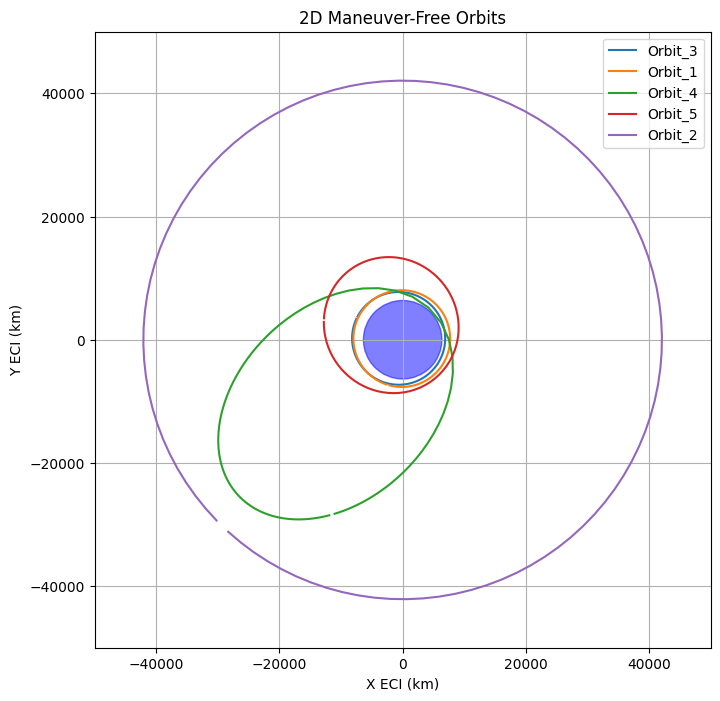

In [3]:
# Test 1: 2D Maneuver-Free Orbits
print("Generating 2D Maneuver-Free Orbits...")
df_2d_no_man = orbit_generator.generate_orbits_dataset(n_orbits=5, time_step=60*u.s, num_steps=100, two_d=True)
unique_ids = df_2d_no_man['orbit_id'].unique()
dfs_2d_no_man = [df_2d_no_man[df_2d_no_man['orbit_id'] == oid] for oid in unique_ids]
plot_2d_orbits(dfs_2d_no_man, "2D Maneuver-Free Orbits")

Test 2: Generating 2D Orbits with Maneuvers...


Generating perturbed orbits:   0%|          | 0/3 [00:00<?, ?it/s]/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
Generating perturbed orbits: 100%|██████████| 3/3 [00:12<00:00,  4.25s/it]


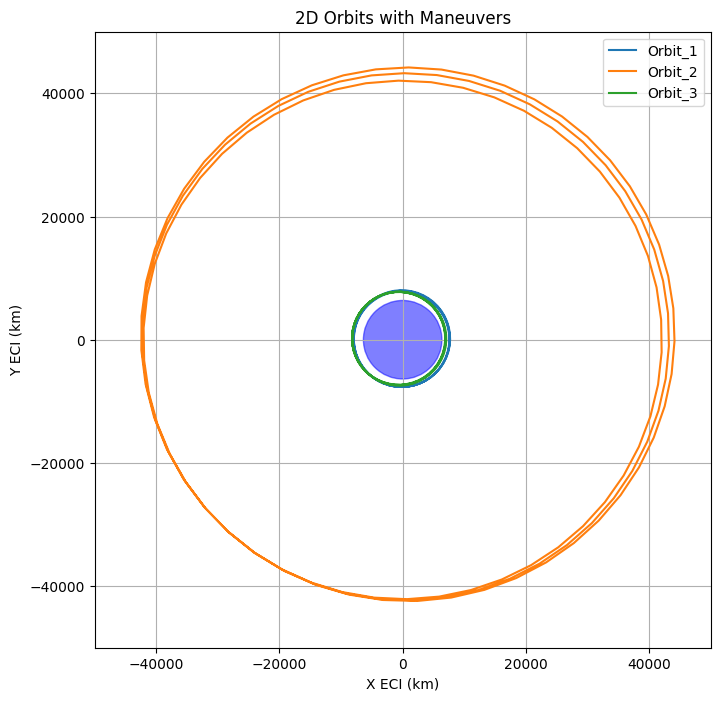

In [7]:
# Test 2: 2D Orbits with Maneuvers (generate 3 for plotting)
print("Test 2: Generating 2D Orbits with Maneuvers...")
df_2d_man = orbit_generator.generate_perturbed_dataset(n_orbits=3, max_dv_per=50, max_num_burns=3, max_total_dv=100,
                                                       max_time_btwn=3600*u.s, max_total_time=86400*u.s, time_step=60*u.s,
                                                       num_steps_per_seg=50, two_d=True)
unique_ids = df_2d_man['orbit_id'].unique()
dfs_2d_man = [df_2d_man[df_2d_man['orbit_id'] == oid] for oid in unique_ids]
plot_2d_orbits(dfs_2d_man, "2D Orbits with Maneuvers")

Generating 3D Maneuver-Free Orbits...


Generating orbits:   0%|          | 0/5 [00:00<?, ?it/s]/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
Generating orbits: 100%|██████████| 5/5 [00:13<00:00,  2.68s/it]


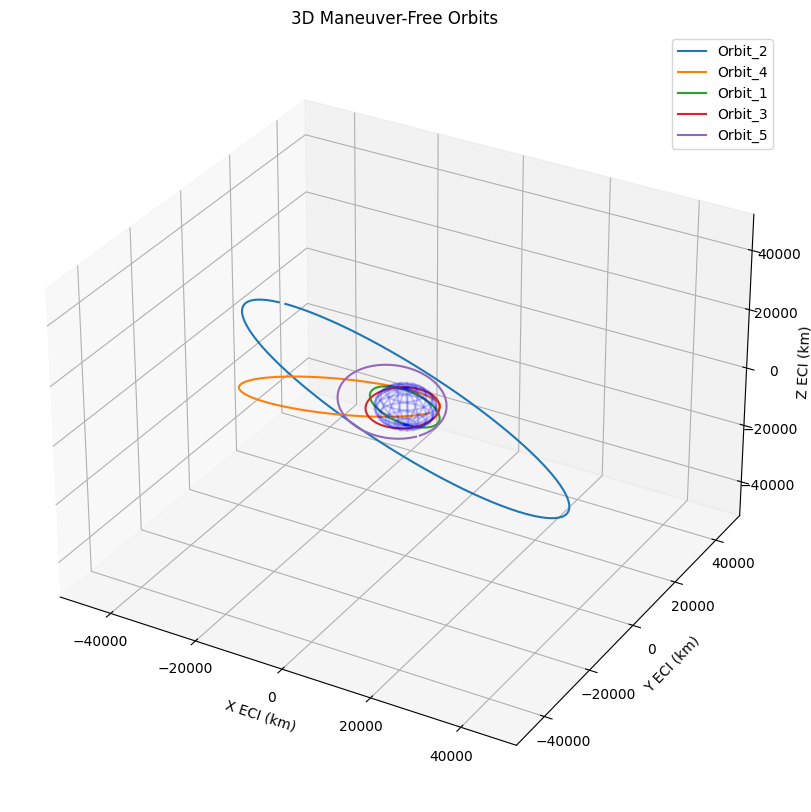

In [ ]:
# Test 3: 3D Maneuver-Free Orbits
print("Generating 3D Maneuver-Free Orbits...")
df_3d_no_man = orbit_generator.generate_orbits_dataset(n_orbits=5, time_step=60*u.s, num_steps=100, two_d=False)
unique_ids = df_3d_no_man['orbit_id'].unique()
dfs_3d_no_man = [df_3d_no_man[df_3d_no_man['orbit_id'] == oid] for oid in unique_ids]
plot_3d_orbits(dfs_3d_no_man, "3D Maneuver-Free Orbits")

Generating 3D Orbits with Maneuvers...


Generating perturbed orbits:   0%|          | 0/3 [00:00<?, ?it/s]/Users/justinbrittain/Projects/diffusion-transfer/.venv/lib/python3.8/site-packages/astropy/units/decorators.py:316: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)
Generating perturbed orbits: 100%|██████████| 3/3 [00:10<00:00,  3.60s/it]


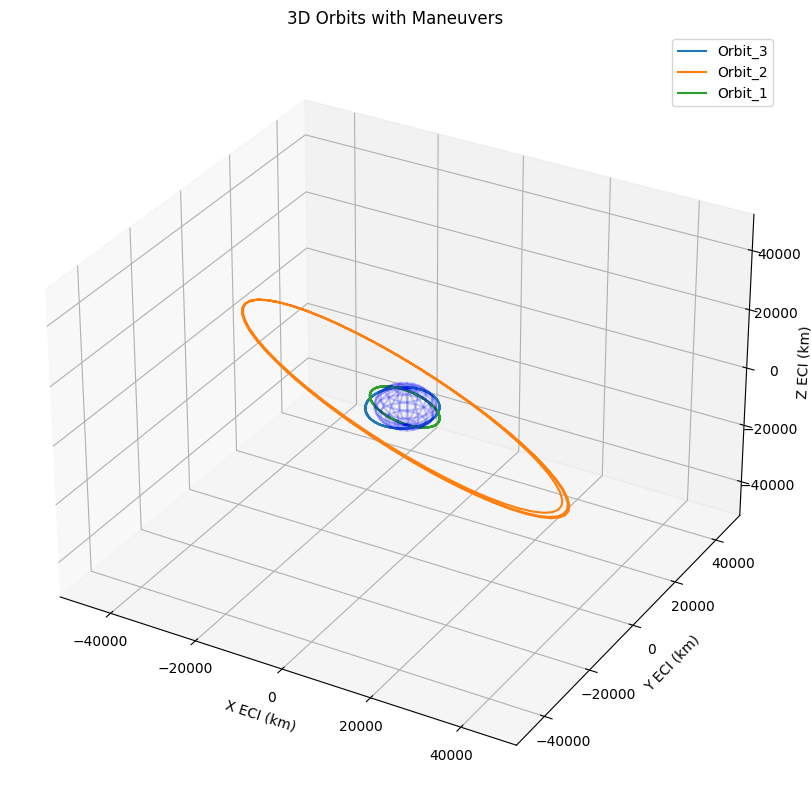

In [12]:
# Test 4: 3D Orbits with Maneuvers
print("Generating 3D Orbits with Maneuvers...")
df_3d_man = orbit_generator.generate_perturbed_dataset(n_orbits=3, max_dv_per=50, max_num_burns=3, max_total_dv=100,
                                                       max_time_btwn=3600*u.s, max_total_time=86400*u.s, time_step=60*u.s,
                                                       num_steps_per_seg=50, two_d=False)
unique_ids = df_3d_man['orbit_id'].unique()
dfs_3d_man = [df_3d_man[df_3d_man['orbit_id'] == oid] for oid in unique_ids]
plot_3d_orbits(dfs_3d_man, "3D Orbits with Maneuvers")

In [ ]:
# Example usage
dataset = OrbitDataset('orbits_2d_dataset.npz')
loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = SimpleDiffusionUNet(hidden_dim=128)  # Vary hidden_dim for size experiments
train(model, loader)